#  Support Vector Machine with Randomized Search
SVM is trained on feature set 2

## Get the data 

In [5]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from collections import defaultdict
from time import time
import pickle  
import sklearn
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

%store -r
%store

Stored variables and their in-db values:
X_16_val                  -> array([[ 3.00880939,  0.26443017,  1.05370334, ...
X_32_val                  -> array([[-0.13964146,  0.53184264, -0.71694033, ...
X_32test_std              -> defaultdict(<class 'list'>, {0: array([[-0.1396414
X_32train_std             -> array([[-0.80277066, -0.49489511, -0.83240094, ...
X_test                    -> defaultdict(<class 'list'>, {0: array([[[-0.006215
X_test_std                -> defaultdict(<class 'list'>, {0: array([[ 3.0088093
X_train                   -> array([[[-0.01174874, -0.00817356, -0.0042913 , ..
X_train_std               -> array([[-0.80277066, -0.49489511, -0.83240094, ...
snrs                      -> [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 
y_16_val                  -> array([3, 5, 1, ..., 2, 4, 0])
y_32_test                 -> defaultdict(<class 'list'>, {0: array([2, 2, 3, ..
y_32_train                -> array([5, 0, 2, ..., 4, 6, 6])
y_32_val                  -> array([2, 

In [2]:
print("Training data: ", X_32train_std.shape, "and labels: ", y_32_train.shape)
print(" ")
print("Test data:")
print("Total", len(X_32test_std), X_32test_std[18].shape, "arrays for SNR values:")
print(sorted(X_32test_std.keys()))

Training data:  (80000, 32) and labels:  (80000,)
 
Test data:
Total 20 (4000, 32) arrays for SNR values:
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


## Train and test the classifier

In [9]:
#Train the classifier

from sklearn import svm

params = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6)}

rand_search_cv = RandomizedSearchCV(svm.SVC(cache_size = 5000), params, verbose=1)

start = time()
rand_search_cv.fit(X_train_std, y_train)
print("Randomized search took %.2f minutes "%((time() - start)//60))
print("   ")
print("Result of randomized search, best estimator:")
print(rand_search_cv.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 315.9min finished


Randomized search took 324.00 minutes 
   
Result of randomized search, best estimator:
SVC(C=10.0, cache_size=5000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [5]:
#Test the classifier

import collections

y_pred = defaultdict(list)
accuracy = defaultdict(list)

print("Test the classifier")
print(" ")
for snr in snrs:
    y_pred[snr] = rand_search_cv.predict(X_32test_std[snr])
    accuracy[snr] = metrics.accuracy_score(y_32_test[snr], y_pred[snr])
    print("SVM's accuracy on %d dB SNR samples = "%(snr), accuracy[snr])   
    
accuracy = collections.OrderedDict(sorted(accuracy.items()))  #sort by ascending SNR value

Test the classifier
 
SVM's accuracy on -20 dB SNR samples =  0.12675
SVM's accuracy on -18 dB SNR samples =  0.12825
SVM's accuracy on -16 dB SNR samples =  0.13525
SVM's accuracy on -14 dB SNR samples =  0.1405
SVM's accuracy on -12 dB SNR samples =  0.1525
SVM's accuracy on -10 dB SNR samples =  0.18
SVM's accuracy on -8 dB SNR samples =  0.2555
SVM's accuracy on -6 dB SNR samples =  0.34375
SVM's accuracy on -4 dB SNR samples =  0.417
SVM's accuracy on -2 dB SNR samples =  0.42225
SVM's accuracy on 0 dB SNR samples =  0.5275
SVM's accuracy on 2 dB SNR samples =  0.67775
SVM's accuracy on 4 dB SNR samples =  0.7585
SVM's accuracy on 6 dB SNR samples =  0.76775
SVM's accuracy on 8 dB SNR samples =  0.775
SVM's accuracy on 10 dB SNR samples =  0.7715
SVM's accuracy on 12 dB SNR samples =  0.77675
SVM's accuracy on 14 dB SNR samples =  0.77625
SVM's accuracy on 16 dB SNR samples =  0.768
SVM's accuracy on 18 dB SNR samples =  0.769


##  Visualize classifier performance

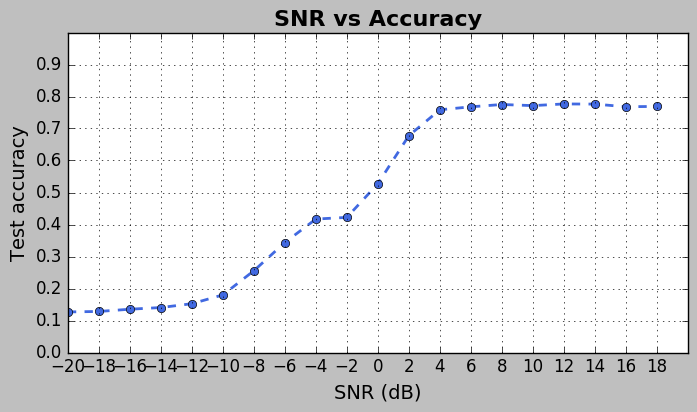

In [6]:
plt.style.use('classic')

fig = plt.figure(figsize=(8, 4), dpi=100)
x = snrs
y = list(accuracy.values())
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()

In [7]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import pandas as pd

classes = ['8PSK', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK']
y_predicted = rand_search_cv.predict(X_32test_std[18])
conf_matrix = confusion_matrix(y_predicted, y_32_test[18]) 

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix Without Normalization")
print(df)

Confusion Matrix Without Normalization
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK    360     2      2     9     2     58     64    68
BPSK      0   492      0     0     4      4      8     3
CPFSK    21     0    497    22     1      7      6    18
GFSK     31     2      1   467     4      7      9    14
PAM4      1     3      0     0   489      6      3     0
QAM16    13     1      0     0     0    134    110    16
QAM64     8     0      0     0     0    244    272    16
QPSK     66     0      0     2     0     40     28   365


Confusion Matrix
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK   0.64  0.00   0.00  0.02  0.00   0.10   0.11  0.12
BPSK   0.00  0.96   0.00  0.00  0.01   0.01   0.02  0.01
CPFSK  0.04  0.00   0.87  0.04  0.00   0.01   0.01  0.03
GFSK   0.06  0.00   0.00  0.87  0.01   0.01   0.02  0.03
PAM4   0.00  0.01   0.00  0.00  0.97   0.01   0.01  0.00
QAM16  0.05  0.00   0.00  0.00  0.00   0.49   0.40  0.06
QAM64  0.01  0.00   0.00  0.00  0.00   0.45   0.50  0.03
QPSK   0.13  0.00   0.00  0.00  0.00   0.08   0.06  0.73


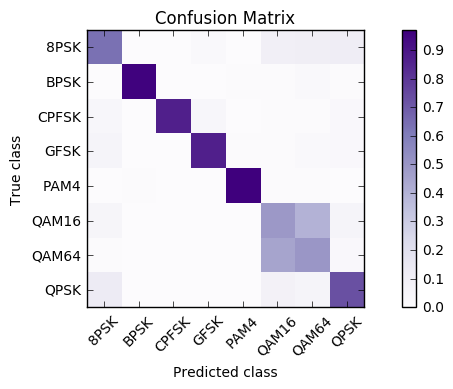

In [4]:
#Normalize the matrix

conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = conf_matrix.round(decimals = 2)

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix")
print(df)

fig1 = plt.figure(figsize=(8, 4), dpi=100)
plt.imshow(conf_matrix, interpolation = 'nearest', cmap = plt.cm.Purples)
ticks = np.arange(len(classes))
plt.title("Confusion Matrix")
plt.xticks(ticks, classes, rotation=45)
plt.yticks(ticks, classes)

plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.tight_layout()
plt.colorbar()
plt.show()

In [12]:
from sklearn.externals import joblib

joblib.dump(rand_search_cv, "svm3.1.pkl")

['svm3.1.pkl']

In [6]:
import pickle
from sklearn.externals import joblib
rand_search_cv = joblib.load("svm3.1.pkl")